<a href="https://www.kaggle.com/code/subhadipde2000/sentiment-analyzer-with-debertav3?scriptVersionId=196550687" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

In the realm of Natural Language Processing (NLP), sentiment analysis stands as a critical task with wide-ranging applications, from customer feedback analysis to market sentiment prediction. This project focuses on the classification of movie reviews as either positive or negative, leveraging the advanced capabilities of the DeBERTaV3 model from KerasNLP. The DeBERTaV3 model, an evolution of the DeBERTa architecture, has shown promising results in various NLP tasks due to its enhanced contextual understanding and efficient training mechanisms.

The dataset utilized in this project comprises a collection of movie reviews, each labeled with a sentiment (positive or negative). The primary objective is to fine-tune the DeBERTaV3 model on this dataset to achieve high accuracy in sentiment classification. This involves several key steps, including data cleaning, preprocessing, and visualization to gain insights into the dataset's characteristics, such as the length of reviews and the distribution of sentiments.

By fine-tuning a state-of-the-art model like DeBERTaV3, we aim to harness its robust language understanding capabilities to accurately classify movie reviews. This project not only demonstrates the application of cutting-edge NLP techniques but also provides a practical example of how such models can be fine-tuned for specific tasks, contributing to the broader field of sentiment analysis.

# Problem Statement

The classification of movie reviews into positive or negative sentiments is a fundamental problem in the domain of Natural Language Processing (NLP). Accurate sentiment analysis is crucial for various applications, including recommendation systems, market research, and customer feedback analysis. However, the complexity and nuances of human language pose significant challenges in achieving high accuracy in sentiment classification.

In this project, we address the problem of sentiment classification by fine-tuning the DeBERTaV3 model from KerasNLP on a dataset of movie reviews. The primary objectives are:

1. **Data Preparation**: Perform thorough data cleaning and preprocessing to ensure the dataset is suitable for model training.
2. **Data Visualization**: Analyze and visualize the dataset to understand the distribution of sentiments and the length of reviews.
3. **Model Fine-Tuning**: Fine-tune the DeBERTaV3 model on the preprocessed dataset to achieve high accuracy in sentiment classification.
4. **Evaluation**: Evaluate the performance of the fine-tuned model using appropriate metrics to assess its effectiveness in classifying movie reviews.

By successfully completing these objectives, we aim to develop a robust sentiment classification model that can accurately distinguish between positive and negative movie reviews, thereby contributing to the advancement of NLP techniques in sentiment analysis.

In [1]:
!nvidia-smi

Fri Sep 13 20:41:23 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P0             25W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Necessary imports

In [2]:
import os
os.environ["KERAS_BACKEND"] = "jax"

import keras
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras_nlp.models import DebertaV3Preprocessor, DebertaV3Classifier

2024-09-13 20:41:29.480279: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-13 20:41:29.480401: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-13 20:41:29.631523: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
warnings.filterwarnings("ignore")

In [4]:
# Reproducability
tf.keras.utils.set_random_seed(256)

# Mixed Precision

Mixed precision is a technique used in deep learning to improve the performance and efficiency of model training by utilizing a combination of different data types, primarily ```float16``` and ```float32```. This approach allows for faster computations and reduced memory usage without significantly compromising the model's accuracy.

In [5]:
keras.mixed_precision.set_global_policy("mixed_float16")

# Reading the dataset

In [6]:
# Reading the dataset
filepath = '/kaggle/input/rotten-tomato-movie-reviews-1-44m-rows/rotten_tomatoes_movie_reviews.csv'
df = pd.read_csv(filepath)
df.head(3)

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...
2,city_hunter_shinjuku_private_eyes,2590987,2019-05-28,Reuben Baron,False,NaN,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE,https://www.cbr.com/city-hunter-shinjuku-priva...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444963 entries, 0 to 1444962
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   id              1444963 non-null  object
 1   reviewId        1444963 non-null  int64 
 2   creationDate    1444963 non-null  object
 3   criticName      1444963 non-null  object
 4   isTopCritic     1444963 non-null  bool  
 5   originalScore   1009745 non-null  object
 6   reviewState     1444963 non-null  object
 7   publicatioName  1444963 non-null  object
 8   reviewText      1375738 non-null  object
 9   scoreSentiment  1444963 non-null  object
 10  reviewUrl       1234038 non-null  object
dtypes: bool(1), int64(1), object(9)
memory usage: 111.6+ MB


# Exploratory Data Analysis

In [8]:
# Dropping duplicate rows from the dataframe, if any
num_dup = df.duplicated().sum()
if num_dup > 0:
    df.drop_duplicates(inplace=True)
    print(f"Dropped {num_dup} dupliacte rows from the dataframe.")
    print(f'Now the dataframe has {len(df)} rows.')
else:
    print(f"There are {num_dup} duplicate rows in the dataframe.")

Dropped 12394 dupliacte rows from the dataframe.
Now the dataframe has 1432569 rows.


In [9]:
def review_lengths():
    '''
    This function will print the average length, the maximum length, and the minimum length of the reviews in terms
    of the number of words, when called.
    '''
    
    max_len, min_len, total_len = 0, 99999999999999, 0

    df['reviewText'] = df['reviewText'].astype(str)

    for text in df['reviewText'].tolist():
        if text != None:
            total_len += len(text.split())
            if len(text.split()) > max_len:
                max_len = len(text.split())
            if len(text.split()) < min_len:
                min_len = len(text.split())

    avg_len = round(total_len/len(df))
    print(f"The longest 'reviewText' has {max_len} words, the shortest 'reviewText' has {min_len} words, and the average 'reviewText' length is {avg_len} words.")

In [10]:
review_lengths()

The longest 'reviewText' has 55 words, the shortest 'reviewText' has 1 words, and the average 'reviewText' length is 21 words.


* We can see that the shortest review has only 1 word.
* Let's inspect those reviews now.

In [11]:
# Checking the elements of the 'reviewText' column which has only 1 word
df[df['reviewText'].apply(lambda x: len(x.split()) == 1)]['reviewText']

32           nan
33           nan
36           nan
37           nan
39           nan
           ...  
1441690      nan
1441691      nan
1441692      nan
1442757      nan
1444578    Yawn.
Name: reviewText, Length: 70420, dtype: object

* We can see that most of reviews with 1 word has has the word 'nan' as the review text.
* This might not be the usual ```NaN``` or ```NA``` values that we see in pands.
* So, to drop these rows, we will use python's error handling.

In [12]:
# Dropping the rows with 'nan' values from the 'reviewText' column
a = len(df)
try:
    df.dropna(subset=['reviewText'], inplace=True)
except:
    pass
else:
    df = df[df['reviewText'] != 'nan']
finally:
    b = len(df)
    x = len(df[df['reviewText'].apply(lambda x: len(x.split()) == 1 and x == 'nan')])
    print(f"Dropped {a-b} rows from the dataframe. \nNow, the dataframe has {x} rows with 'nan' values in the 'reviewText' column.")

Dropped 68694 rows from the dataframe. 
Now, the dataframe has 0 rows with 'nan' values in the 'reviewText' column.


* Let's check the review lengths once again as they might have changed because we just dropped 68694 rows.

In [13]:
review_lengths()

The longest 'reviewText' has 55 words, the shortest 'reviewText' has 1 words, and the average 'reviewText' length is 22 words.


* As you can see that, after dropping the rows with 'nan' values in the 'reviewText' column, the average length of the reviews has increased from 21 to 22. 

### Visualizations

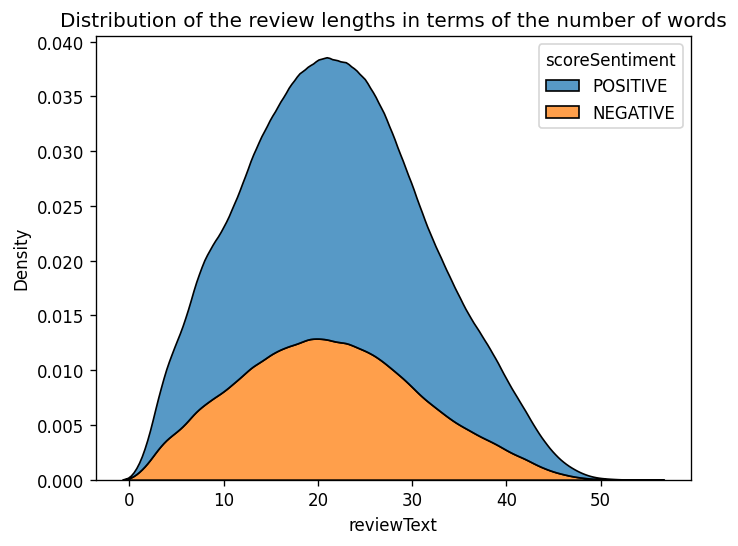

In [14]:
plt.figure(dpi=120)
plt.title('Distribution of the review lengths in terms of the number of words')
sns.kdeplot(data=df, x=df['reviewText'].str.split().apply(len), hue='scoreSentiment', multiple='stack');

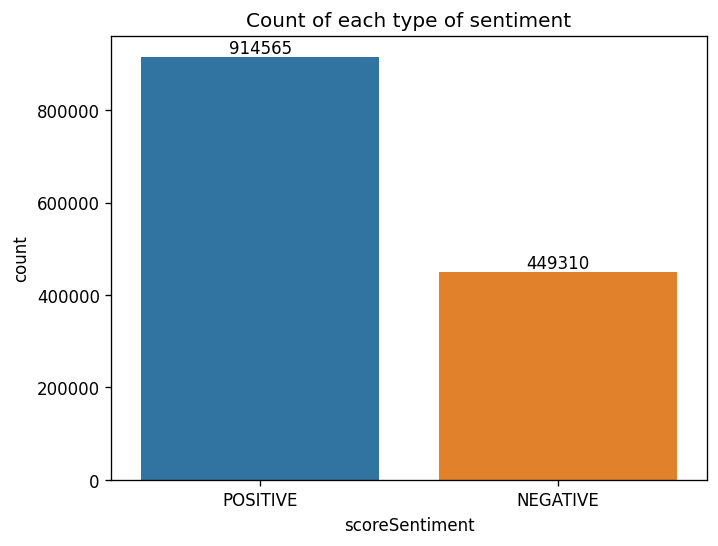

In [15]:
plt.figure(dpi=120)
plt.title("Count of each type of sentiment")
ax = sns.countplot(data=df, x='scoreSentiment')
ax.bar_label(ax.containers[0], fontsize=10);

# Preparing the data

In [16]:
df = df[['reviewText', 'scoreSentiment']].astype(str)
df.head()

,reviewText,scoreSentiment
0,Timed to be just long enough for most youngste...,POSITIVE
1,It doesn't matter if a movie costs 300 million...,NEGATIVE
2,The choreography is so precise and lifelike at...,POSITIVE
3,The film's out-of-touch attempts at humor may ...,NEGATIVE
4,Its clumsy determination is endearing and some...,POSITIVE


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1363875 entries, 0 to 1444962
Data columns (total 2 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   reviewText      1363875 non-null  object
 1   scoreSentiment  1363875 non-null  object
dtypes: object(2)
memory usage: 31.2+ MB


# Train-Validation-Test split

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(
    df['reviewText'],
    df['scoreSentiment'],
    test_size=0.03,
    random_state=42
)

X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, random_state=42)

# Data Preprocessing

In [19]:
# DeBERTaV3 preprocessor
preprocessor = DebertaV3Preprocessor.from_preset(
    preset="deberta_v3_extra_small_en",
    sequence_length=22 # average length of reviews
)

Attaching 'model.safetensors' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'model.safetensors.index.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'metadata.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'metadata.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'preprocessor.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'tokenizer.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'tokenizer.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'assets/tokenizer/vocabulary.spm' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...


In [20]:
# Let's have a look at how the DeBERTaV3 pre-processor works
x = random.randint(0, len(df))

text = df.iloc[x, 0]
processed_text = preprocessor(text)

print(f'Original text: \n{text}\n')
print(f'Processed text with DeBERTaV3 preprocessor: \n{processed_text}')

Original text: 
Whatever brainstorming session came up with Up allowed Docter and co-director Bob Peterson to grapple not only with old age, but with the kind of maturity rarely broached by cartoons.

Processed text with DeBERTaV3 preprocessor: 
{'token_ids': Array([    1,  6091, 30490,  2029,   670,   322,   275,  2745,  1614,
         771, 65878,   263,  1376,   271, 20941,  3877, 14079,   264,
       31156,   298,   364,     2], dtype=int32), 'padding_mask': Array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True], dtype=bool)}


In [21]:
# Function for pre-processing text
def preprocess_fn(text, label=None):
    text = preprocessor(text)
    return (text, label) if label is not None else text

# Building tensorflow datasets

* While constructing the tensorflow datasets, we will make some changes in how we are defining the sentiments.
* The positive sentiments will now be represented as ```[1, 0]```, and the negative sentiments will be represented as ```[0,1]```.
* This will later help us in knowing, how much does the model thinks that a review is postive or negative.

In [22]:
# Function for building tensorflow datasets
def build_tf_dataset(reviews, sentiments=None, BATCH_SIZE=32, shuffle=True):
    AUTO = tf.data.AUTOTUNE
    options = tf.data.Options()
    options.experimental_deterministic = False
    
    reviews = tf.convert_to_tensor(reviews.tolist() if not isinstance(reviews, list) else reviews)
    if sentiments is not None:
        sentiments = [[1, 0] if value == 'POSITIVE' else [0, 1] for value in sentiments]
        sentiments = tf.convert_to_tensor(sentiments)
        
    slices = (reviews,) if sentiments is None else (reviews, sentiments)
    
    dataset = tf.data.Dataset.from_tensor_slices(slices).cache()
    dataset = dataset.map(preprocess_fn, num_parallel_calls=AUTO)
    if shuffle:
        dataset = dataset.shuffle(1024, seed=101)
    dataset = dataset.with_options(options).batch(BATCH_SIZE).prefetch(AUTO)
    
    return dataset

In [23]:
train_dataset = build_tf_dataset(X_train, y_train)
valid_dataset = build_tf_dataset(X_valid, y_valid)
test_dataset = build_tf_dataset(X_test, y_test)

# Modelling

The `debertaV3_extra_small_en` model is a variant of the DeBERTa (Decoding-enhanced BERT with disentangled attention) V3 architecture, designed to be highly compact and efficient. The model uses **disentangled attention mechanisms** and a **gated relative position bias** to improve the model's ability to capture long-range dependencies and context within text. Despite being an "extra small" model, it retains strong language understanding capabilities, making it ideal for tasks like text classification, sentiment analysis, and more. Its reduced size allows for faster inference and lower memory usage, making it well-suited for resource-constrained environments.

In [24]:
classifier = DebertaV3Classifier.from_preset(
    "deberta_v3_extra_small_en",
    preprocessor=None,
    activation = 'softmax',
    num_classes=2
)

Attaching 'model.safetensors' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'model.safetensors.index.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'metadata.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'metadata.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'task.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'config.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'model.safetensors' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'model.safetensors.index.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'metadata.json' from m

In [25]:
classifier.compile(
    optimizer=keras.optimizers.AdamW(1e-4),
    loss=keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=[
        'accuracy',
    ]
)

In [26]:
classifier.summary()

Model: "deberta_v3_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ deberta_v3_backbone           │ (None, None, 384)         │      70,682,112 │ padding_mask[0][0],        │
│ (DebertaV3Backbone)           │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item (GetItem)            │ (None, 384)               │               0 │ deberta_v3_backbone[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pooled_dropout (Dropout)      │ (None, 384)               │               0 │ get_item[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pooled_dense (Dense)          │ (None, 384)               │         147,840 │ pooled_dropout[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ classifier_dropout (Dropout)  │ (None, 384)               │               0 │ pooled_dense[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 2)                 │             770 │ classifier_dropout[0][0]   │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 70,830,722 (270.20 MB)

 Trainable params: 70,830,722 (270.20 MB)

 Non-trainable params: 0 (0.00 B)

# Model training

In [27]:
history = classifier.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=1
)

41343/41343 ━━━━━━━━━━━━━━━━━━━━ 5074s 122ms/step - accuracy: 0.8291 - loss: 0.3777 - val_accuracy: 0.8606 - val_loss: 0.3228


# Model evaluation

In [28]:
test_loss, test_accuracy = classifier.evaluate(test_dataset)
print(f"The model loss on the test dataset is {round(test_loss, 4)}.")
print(f"The model accuracy on the test dataset is {round(test_accuracy*100, 4)}%.")

640/640 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.8578 - loss: 0.3281
The model loss on the test dataset is 0.3266.
The model accuracy on the test dataset is 86.0062%.


* Let's now test the model performance on some sample reviews

In [29]:
def predict_sentiments(reviews):
    if isinstance(reviews, list):
        tf_df = build_tf_dataset(reviews, BATCH_SIZE=min(32, len(reviews)))
        preds = classifier.predict(tf_df)
        for i in range(len(reviews)):
            POSITIVE = round(preds[i][0]*100, 3)
            NEGATIVE = round(preds[i][1]*100, 3)
            print(f"REVIEW TEXT:\n{reviews[i]}\nPOSTIVE Sentiment - {POSITIVE}%  |  NEGATIVE Sentiment - {NEGATIVE}%\n\n")
    else:
        print("Put the reviews in a list.")

In [30]:
reviews = [
    "Amazing! A movie that everyone should see.",
    "Incredibly captivating! A cinematic gem that's not to be missed.",
    "Stunningly brilliant! A film that will stay with you forever.",
    "Utterly disappointing. A waste of time with no redeeming qualities. Avoid at all costs.",
    "Dreadfully dull. A complete waste of talent and resources.",
    "Painfully uninspired. A film that lacks any creativity."
]
predict_sentiments(reviews)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
REVIEW TEXT:
Amazing! A movie that everyone should see.
POSTIVE Sentiment - 1.288%  |  NEGATIVE Sentiment - 98.73%


REVIEW TEXT:
Incredibly captivating! A cinematic gem that's not to be missed.
POSTIVE Sentiment - 99.902%  |  NEGATIVE Sentiment - 0.119%


REVIEW TEXT:
Stunningly brilliant! A film that will stay with you forever.
POSTIVE Sentiment - 99.902%  |  NEGATIVE Sentiment - 0.116%


REVIEW TEXT:
Utterly disappointing. A waste of time with no redeeming qualities. Avoid at all costs.
POSTIVE Sentiment - 1.374%  |  NEGATIVE Sentiment - 98.633%


REVIEW TEXT:
Dreadfully dull. A complete waste of talent and resources.
POSTIVE Sentiment - 99.902%  |  NEGATIVE Sentiment - 0.116%


REVIEW TEXT:
Painfully uninspired. A film that lacks any creativity.
POSTIVE Sentiment - 1.311%  |  NEGATIVE Sentiment - 98.633%


